How many clusters? 5


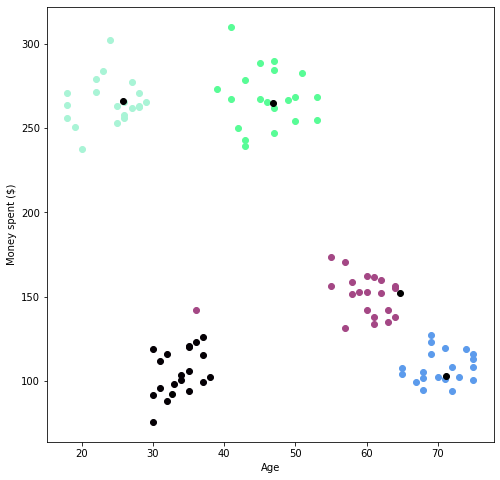

In [71]:
## Program description: K-Means Clustering - user can specify the number of clusters  ##
## Name of Author: Aditya Ranjan ##
## ----------------------------------------------------------------------------- ##


#Import Essential Libraries
import math
import matplotlib.pyplot as plt
import numpy as np
import random


#Sets the size of the figure
plt.rcParams["figure.figsize"] = (8, 8)


#Creating X values, Y values, and clusters lists
NumClusters = int(input("How many clusters? "))
xValues, yValues, clusters = [], [], [[] for i in range(NumClusters)]


#Valentine's Day 2020 Data Preparation

#Normal distributions centered around the average amount of money spent by each age group on Valentine's Day 2020
#Data is from the National Retail Foundation
Money = []
Money.append(list(np.random.normal(loc = 266, scale = 15, size = 20)))
Money.append(list(np.random.normal(loc = 109, scale = 15, size = 20)))
Money.append(list(np.random.normal(loc = 268, scale = 15, size = 20)))
Money.append(list(np.random.normal(loc = 151, scale = 15, size = 20)))
Money.append(list(np.random.normal(loc = 111, scale = 15, size = 20)))

#Random distributions based on the age intervals for each age group
#Data is from the National Retail Foundation
Age = []
Age.append([random.randint(18, 29) for i in range(20)])
Age.append([random.randint(30, 38) for i in range(20)])
Age.append([random.randint(39, 54) for i in range(20)])
Age.append([random.randint(55, 64) for i in range(20)])
Age.append([random.randint(65, 75) for i in range(20)])

#Adds all values to X values and Y values lists
for i in range(len(Money)):
  for j in range(len(Money[i])):
    xValues.append(Age[i][j])
    yValues.append(Money[i][j])


#Calculates the distance between two points
def distance(pointOne, pointTwo):
  return ((((pointOne[0] - pointTwo[0]) ** 2) + ((pointOne[1] - pointTwo[1]) ** 2)) ** 0.5)


#Finds the average point of a cluster
def average(cluster):
  xSum, ySum = 0, 0
  for i in range(len(cluster)):
    xSum += cluster[i][0]
    ySum += cluster[i][1]
  return ([xSum / (len(cluster) + 0.1), ySum / (len(cluster) + 0.1)])


#Initially randomizes the center points
centers = [(np.random.randint(min(xValues), max(xValues)), np.random.randint(min(yValues), max(yValues))) for f in range(NumClusters)]


#K-Means Clustering Algorithm

numDifferences = 1
iterationNum = 0

#Loop will stop when the algorithm converges
while numDifferences != 0:

  #Stores the previous iteration's clusters
  if iterationNum > 0:
    tempClusters = [[] for g in range(NumClusters)]
    for i in range(NumClusters):
      tempClusters[i].extend(clusters[i])

  for i in range(NumClusters):
    clusters[i].clear()

  #Adds each point to a cluster based on the distance from each center point
  for i in range(len(xValues)):
    tempDistances = []
    for j in range(NumClusters):
      tempDistances.append(distance(centers[j], (xValues[i], yValues[i])))
    clusters[tempDistances.index(min(tempDistances))].append((xValues[i], yValues[i]))
    tempDistances.clear()

  #Calculates how many points are different between the current clusters and the previous iteration's clusters
  if iterationNum > 0:
    numDifferences = 0
    for i in range(NumClusters):
      numDifferences += len(list(set(tempClusters[i]) ^ set(clusters[i])))

  #Breaks out of loop as soon as the algorithm converges
  if numDifferences == 0:
    break

  #Calculates new centers based on the average points of the clusters
  for i in range(NumClusters):
    centers[i] = average(clusters[i])
    
    #Random offset - prevents the algorithm from getting stuck at local minimums (doesn't guarantee a solution that is perceived to be optimal by humans)
    centers[i][0] += random.randint(-10, 10)
    centers[i][1] += random.randint(-15, 15)
    
  iterationNum += 1


#Plots the final clusters and centroids
plt.xlabel("Age")
plt.ylabel("Money spent ($)")
for i in range(NumClusters):
  tempColor = [[random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)]]
  for j in range(len(clusters[i])):
    plt.scatter(clusters[i][j][0], clusters[i][j][1], c = tempColor)
  plt.scatter(centers[i][0], centers[i][1], color = "black")